**<h1 style="color:red"> MAKE A COPY OF THIS NOTEBOOK TO START WORKING</h1>**

Import Statements

In [39]:
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

# CODE HERE (add more imports)
import torch
import torch.nn as nn
from tqdm import tqdm

#Import the Dataset

Kaggle is an open source dataset library. We will pull a dataset from Kaggle using the kagglehub API; this allows us to import datasets right into our google colab notebook without having to generate a API key. This is the link to the dataset if you would like to check it out!

https://www.kaggle.com/datasets/datamunge/sign-language-mnist/data

<img src="https://storage.googleapis.com/kaggle-datasets-images/3258/5337/0dade1b95b22cceac471b309fc8a8f63/dataset-cover.png" alt="Sign Language Dataset">



#### Before we import the dataset, let's create a dictionary that matches a numerical index to one of the letters that is being signed.

Tips:
- Start the index at 0 (so '0': 'A' should be the first entry in the dictionary)
- The letter J isn't included in this dataset, so skip this (should have 25 entries in dictionary in total; indices from 0 to 24).

In [40]:
num_to_letter = {
  0: 'A',
  1: 'B',
  2: 'C',
  3: 'D',
  4: 'E',
  5: 'F',
  6: 'G',
  7: 'H',
  8: 'I',
  9: 'K',
  10: 'L',
  11: 'M',
  12: 'N',
  13: 'O',
  14: 'P',
  15: 'Q',
  16: 'R',
  17: 'S',
  18: 'T',
  19: 'U',
  20: 'V',
  21: 'W',
  22: 'X',
  23: 'Y',
  24: 'Z'
}


#### Import Kaggle & the Dataset

In [41]:
!pip install --upgrade kagglehub

In [42]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sign-language-mnist


In [43]:
print(os.listdir(path))

['sign_mnist_test.csv', 'sign_mnist_test', 'sign_mnist_train', 'amer_sign2.png', 'amer_sign3.png', 'sign_mnist_train.csv', 'american_sign_language.PNG']


In [44]:
train_dir = os.path.join(path, "sign_mnist_train.csv")
test_dir = os.path.join(path, "sign_mnist_test.csv")

In [45]:
train_df=pd.read_csv(train_dir)
test_df=pd.read_csv(test_dir)

train_images=train_df.drop('label',axis=1).values.reshape((-1,28,28,1))
train_labels=train_df['label'].values

test_images=test_df.drop('label',axis=1).values.reshape((-1,28,28,1))
test_labels=test_df['label'].values

In [46]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


In [47]:
# One image's shape is
train_images[0].shape

(28, 28, 1)

Can you explain what these  numbers mean?


(28, 28, 1) shape means: image is 28 pixels high * 28 pixels wide, and it has 1 color channel (grayscale).


#Visualize the Data

Visualize some images from `train_images` and `test_images` and then look at the corresponding labels (Keep in mind, they are numbers!)
>When interpreting what the numbers are look at the image at the top of the notebook. There are

Use `plt.imshow(Put the image here)` -> Accepts (Height, Width, Channel)
>Plug in an index of data



In [49]:
# CODE HERE (set up image_num with text input)
image_num = int(input("Enter the image index (0 to {}): ".format(len(train_images) - 1)))

Enter the image index (0 to 27454): 3


In [50]:
# CODE HERE (print shape of image)
print(f'Selected image shape: {train_images[image_num].shape}')

Selected image shape: (28, 28, 1)


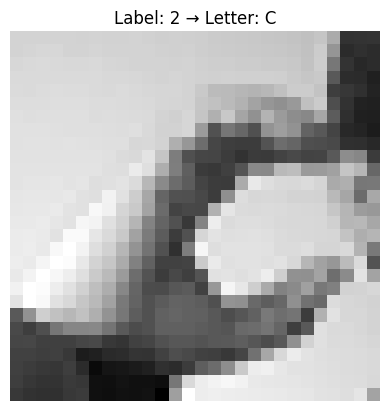

In [51]:
# CODE HERE (plot the image)
plt.imshow(train_images[image_num].squeeze(), cmap='gray')
plt.title(f"Label: {train_labels[image_num]} → Letter: {num_to_letter[train_labels[image_num]]}")
plt.axis('off')
plt.show()

In [52]:
for i in range(10):
    print(f"Image index: {i} → Label: {train_labels[i]} → Letter: {num_to_letter[train_labels[i]]}")


Image index: 0 → Label: 3 → Letter: D
Image index: 1 → Label: 6 → Letter: G
Image index: 2 → Label: 2 → Letter: C
Image index: 3 → Label: 2 → Letter: C
Image index: 4 → Label: 13 → Letter: O
Image index: 5 → Label: 16 → Letter: R
Image index: 6 → Label: 8 → Letter: I
Image index: 7 → Label: 22 → Letter: X
Image index: 8 → Label: 3 → Letter: D
Image index: 9 → Label: 3 → Letter: D


In [53]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

#Create the Model

In [54]:
class MLP(nn.Module):
  def __init__(self, input_layer=784, output=25):
    # CODE HERE (remove the pass afterwards, use Sequential API)
    super().__init__()

    self.network = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_layer, 256), # 1st hidden layer
        nn.ReLU(),
        nn.Linear(256, 128),  # 2nd hidden layer
        nn.ReLU(),
        nn.Linear(128, 64),   # 3rd hidden layer
        nn.ReLU(),
        nn.Linear(64, output) # output layer
    )

  def forward(self, x):
    return self.network(x)

model = MLP()

In [55]:
# CODE HERE (import torch summary)
from torchsummary import summary


In [56]:
# CODE HERE (print model summary)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
              ReLU-3                  [-1, 256]               0
            Linear-4                  [-1, 128]          32,896
              ReLU-5                  [-1, 128]               0
            Linear-6                   [-1, 64]           8,256
              ReLU-7                   [-1, 64]               0
            Linear-8                   [-1, 25]           1,625
Total params: 243,737
Trainable params: 243,737
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.93
Estimated Total Size (MB): 0.95
----------------------------------------------------------------


#Create the dataloaders

In [57]:
# CODE HERE (setup train_images, train_labels, test_images, test_labels as tensors)
# Convert images to float tensors and normalize (divide by 255)
train_images_tensor = torch.tensor(train_images, dtype=torch.float32) / 255.0
test_images_tensor = torch.tensor(test_images, dtype=torch.float32) / 255.0

# Convert labels to integer tensors
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

In [58]:
# CODE HERE (print shape of all 4 tensors)
print(train_images_tensor.shape)
print(train_labels_tensor.shape)
print(test_images_tensor.shape)
print(test_labels_tensor.shape)

torch.Size([27455, 28, 28, 1])
torch.Size([27455])
torch.Size([7172, 28, 28, 1])
torch.Size([7172])


In [59]:
# CODE HERE (setup train_set and test_set as a TensorDataset)
from torch.utils.data import TensorDataset
train_set = TensorDataset(train_images_tensor, train_labels_tensor)
test_set = TensorDataset(test_images_tensor, test_labels_tensor)

In [60]:
# CODE HERE (setup train_loader and test_loader using DataLoader)
from torch.utils.data import DataLoader
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

#Create the Loss Function & Optimizer

Tips:
- To determine what loss function to use, think about the type of task this model is supposed to perform, and recall which loss function we use for that task.
- Use the same optimizer which we used in the in-class lecture (we'll be using this one for most of our projects)

In [67]:
# CODE HERE (loss_fn & optimizer)
# Cross Entropy Loss is best for multi-class classification problem
# loss function
loss_fn = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

#Create the Train Loop

Recall all of the steps of the train_loop from the in-class project

In [68]:
def train_loop(model, train_loader, loss_fn, optimizer, epochs):
  # CODE HERE (steps 2-3)
  model.train()
  train_loss = []

  for epoch in range(epochs):
    train_loss_epoch = 0

    for image, label in tqdm(train_loader, desc="Training Model"):
      # CODE HERE (steps 6-9)
      optimizer.zero_grad()
      pred = model(image)
      loss = loss_fn(pred, label)
      loss.backward()
      optimizer.step()
      train_loss_epoch += loss.item()

    # CODE HERE (steps 10-11) - note the indent is different
    avg_loss = train_loss_epoch / len(train_loader)
    train_loss.append(avg_loss)
    print(f"Epoch {epoch + 1}/{epochs} - Loss: {train_loss_epoch:.4f}")

  return train_loss

In [70]:
# CODE HERE (run the train_loop by setting it to 'losses' variable)
train_loss = train_loop(model, train_loader, loss_fn, optimizer, epochs=15)

Training Model: 100%|██████████| 858/858 [00:05<00:00, 171.11it/s]


Epoch 1/15 - Loss: 0.7981


Training Model: 100%|██████████| 858/858 [00:05<00:00, 156.30it/s]


Epoch 2/15 - Loss: 2.4117


Training Model: 100%|██████████| 858/858 [00:04<00:00, 179.76it/s]


Epoch 3/15 - Loss: 0.4209


Training Model: 100%|██████████| 858/858 [00:05<00:00, 150.40it/s]


Epoch 4/15 - Loss: 0.3100


Training Model: 100%|██████████| 858/858 [00:04<00:00, 178.08it/s]


Epoch 5/15 - Loss: 0.2461


Training Model: 100%|██████████| 858/858 [00:05<00:00, 154.33it/s]


Epoch 6/15 - Loss: 0.2103


Training Model: 100%|██████████| 858/858 [00:05<00:00, 170.87it/s]


Epoch 7/15 - Loss: 1.9807


Training Model: 100%|██████████| 858/858 [00:04<00:00, 177.77it/s]


Epoch 8/15 - Loss: 0.1755


Training Model: 100%|██████████| 858/858 [00:05<00:00, 147.81it/s]


Epoch 9/15 - Loss: 0.1424


Training Model: 100%|██████████| 858/858 [00:05<00:00, 156.33it/s]


Epoch 10/15 - Loss: 0.1202


Training Model: 100%|██████████| 858/858 [00:05<00:00, 145.93it/s]


Epoch 11/15 - Loss: 0.1111


Training Model: 100%|██████████| 858/858 [00:04<00:00, 177.76it/s]


Epoch 12/15 - Loss: 0.1152


Training Model: 100%|██████████| 858/858 [00:05<00:00, 160.76it/s]


Epoch 13/15 - Loss: 0.0831


Training Model: 100%|██████████| 858/858 [00:05<00:00, 165.13it/s]


Epoch 14/15 - Loss: 2.1341


Training Model: 100%|██████████| 858/858 [00:04<00:00, 176.59it/s]

Epoch 15/15 - Loss: 0.1019


#Visualize the Loss Drop

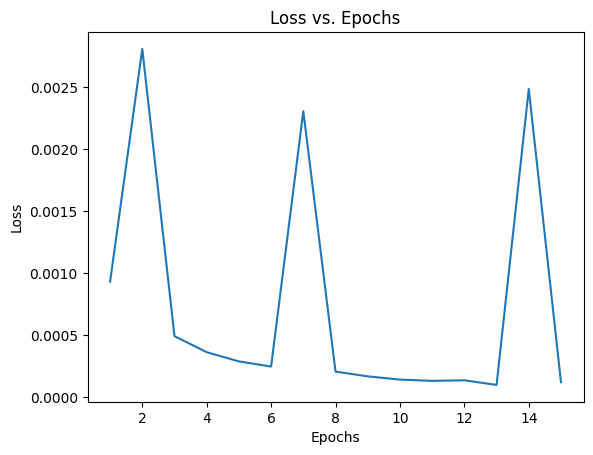

In [71]:
# CODE HERE (plot the Loss vs. Epochs graph)
epoch_list = list(range(1, len(train_loss) + 1))
plt.plot(epoch_list, train_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

#Creating the Testing Function

In [75]:
# CODE HERE (define accuracy function)
def accuracy(correct, total):
  if total == 0:
    return 0
  return correct / total * 100

For the test_loop, again recall the steps we used from the in-class project (but with a few tweaks)

In [79]:
def test_loop(test_dataloader, model):
  # CODE HERE (steps 3-4)
  model.eval()
  correct = 0
  total = 0

  with torch.no_grad():
    for image, label in tqdm(test_dataloader, desc="Testing Model"):
      # CODE HERE (steps 7-8)
      pred = model(image)
      correct += (pred.argmax(1) == label).type(torch.float).sum().item()
      total += len(label)
    # CODE HERE (modified step 9) - print the # of correct predictions and # of total samples - note the indent is different
    print(f"Correct predictions: {int(correct)}")
    print(f"Total samples: {total}")
  # CODE HERE (create an 'accuracy' variable which calculates using your accuracy function)
  calculated_accuracy = accuracy(correct, total)
  print(f"Accuracy: {calculated_accuracy:.2f}%")
  return calculated_accuracy

In [80]:
# CODE HERE (run your test_loop by setting it to an accuracy variable)
accuracy = test_loop(test_loader, model)

Testing Model: 100%|██████████| 225/225 [00:00<00:00, 788.73it/s]

Correct predictions: 5562
Total samples: 7172
Accuracy: 77.55%


Play around a bit with different images from the dataset and see how the
model predicts using it

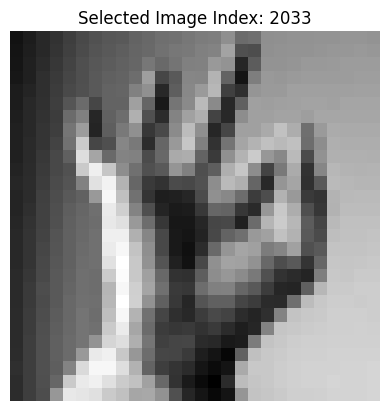

In [124]:
# CODE HERE (pick a random image index - set it to 'image' and plot it using plt)
# If not already done: convert test_images from numpy to PyTorch tensor
if isinstance(test_images, np.ndarray):
    test_images = torch.tensor(test_images, dtype=torch.float32)

# Pick a random valid image index
image = torch.randint(0, len(test_images), (1,)).item()

# Plot the selected image
plt.imshow(test_images[image].squeeze(), cmap='gray')
plt.title(f"Selected Image Index: {image}")
plt.axis('off')
plt.show()

In [125]:
# below code will show model prediction based on the image you picked, you don't have to change this
with torch.no_grad():
  pred = model(test_images[image].to(torch.float32).unsqueeze(0))
  print(num_to_letter[pred.argmax(1).item()])

F


<img src="https://storage.googleapis.com/kaggle-datasets-images/3258/5337/0dade1b95b22cceac471b309fc8a8f63/dataset-cover.png" alt="Sign Language Dataset">

You're all done! Submit this file to Canvas